In [28]:
### This code add gaussian noise to nn-generate data. In its current version it generates 6 csv files: 3 for tanh, 3 for leaky_ReLU, with
#3 realizations of noise.
### The csv files are inputs for codes that compute traces of BMS and that train (other) neural networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [18]:
function='tanh' #tanh, leaky_ReLU
#functions=['tanh', 'leaky_ReLU']
 
realizations=3 #Noise realization. 0,1,2 unless otherwise specified 
sigma=0.02;mean=0;

file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
sample=d.index.stop
print(d.index.stop)

noise = np.random.normal(mean,sigma,sample)

1600


In [19]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)

for realization in range(realizations):
    d.to_csv('../data/'+ 'NN_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,0.021671,0.021671
1,-3.95,0.000344,0.0,-0.017762,-0.017418
2,-3.90,0.000711,0.0,-0.028041,-0.027331
3,-3.85,0.001102,0.0,0.027440,0.028543
4,-3.80,0.001519,0.0,-0.023766,-0.022247
...,...,...,...,...,...
1595,3.75,0.999019,9.0,-0.009146,0.989873
1596,3.80,0.998911,9.0,-0.014938,0.983973
1597,3.85,0.998800,9.0,-0.014303,0.984497
1598,3.90,0.998686,9.0,-0.006591,0.992095


,x1,y,rep,noise,y_noise
1120,-4.00,0.006409,7.0,-0.027087,-0.020679
1121,-3.95,0.006337,7.0,-0.006709,-0.000371
1122,-3.90,0.006265,7.0,0.020717,0.026981
1123,-3.85,0.006191,7.0,0.017952,0.024143
1124,-3.80,0.006116,7.0,-0.007184,-0.001068
...,...,...,...,...,...
1275,3.75,0.889495,7.0,-0.008016,0.881479
1276,3.80,0.918566,7.0,-0.006991,0.911574
1277,3.85,0.946722,7.0,-0.030750,0.915972
1278,3.90,0.973887,7.0,-0.006738,0.967149


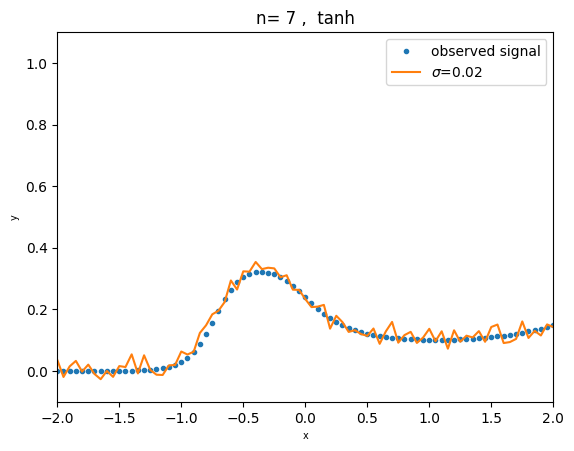

In [20]:
n=7
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed signal')
plt.plot(dn.x1,dn.y_noise,label='$\sigma$=' + str(sigma))
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='nn_' + function + '_sigma_' + str(sigma) + '_n_' + str(n) + '_r_' + str(realization)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)